In [59]:
import os
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sms

os.chdir('.')
###os.listdir()
ASRD = pd.read_csv('AllSharedRewardData.csv')
SubnMood = pd.read_csv('Substance_and_Mood_data_SCORED.csv')

totalscores = ['sub','score_susd_mania','score_susd_depress', 'audit_total_score','dudit_total_score']
keepcolumns = [col for col in SubnMood.columns if col.startswith('aadis_')]
keepcolumns = totalscores + keepcolumns
ASRD = pd.merge(ASRD, SubnMood[keepcolumns], on = 'sub', how = 'right')

ASRD.head()

,sub,gender,SPSRWD,BISBAS_BAS,PC1,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,...,aadis_q4,aadis_q5,aadis_q6,aadis_q7,aadis_q8,aadis_q9,aadis_q10,aadis_q11,aadis_q12,aadis_q13
0,1001,1.0,7.0,44.0,0.748619,5.0,-2.0,5.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1002,2.0,15.0,35.0,-1.338732,4.0,2.0,0.0,-3.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
female = ASRD.query('gender == "1"')['PC1']
male = ASRD.query('gender == "2"')['PC1']
#ASRD['closeness_rating'].max()
display(ASRD[['sub','gender']].groupby('gender').count(),
       ASRD[['PC1','closeness_rating','gender']].groupby('gender').mean())

,sub
gender,
1,32
2,11


,PC1,closeness_rating
gender,,
1,-0.006190,4.562500
2,0.587767,5.090909


In [62]:
ASRD.hist(ASRD[['age']])

KeyError: "None of [Index(['age'], dtype='object')] are in the [columns]"

In [71]:
PC1 = ASRD[ASRD['gender']==2]['PC1']
IOS = ASRD[ASRD['gender']==2]['closeness_rating']
analysis = stats.pearsonr(PC1, IOS)
display(analysis)

PC1 = ASRD[ASRD['gender']==1]['PC1']
IOS = ASRD[ASRD['gender']==1]['closeness_rating']
analysis = stats.pearsonr(PC1, IOS)
display(analysis)

(0.27154207412315334, 0.4192493734716171)

(-0.1443111488076083, 0.43069321987691367)

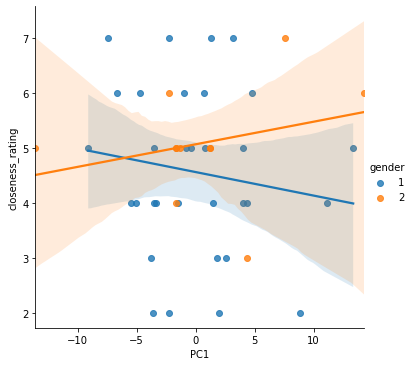

In [63]:
g=sms.lmplot(x='PC1',y='closeness_rating', data=ASRD, hue='gender')

,sub,gender,SPSRWD,BISBAS_BAS,PC1,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,...,aadis_q4,aadis_q5,aadis_q6,aadis_q7,aadis_q8,aadis_q9,aadis_q10,aadis_q11,aadis_q12,aadis_q13
sub,1.000000,-0.005564,0.169497,0.233472,0.223672,0.356683,-0.010430,-0.124002,-0.262166,-0.167469,...,-0.213731,NaN,-0.081756,NaN,NaN,NaN,NaN,NaN,0.064782,NaN
gender,-0.005564,1.000000,0.181787,-0.040349,0.047060,-0.143116,-0.066940,-0.282163,-0.116171,-0.208860,...,0.184482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.140859,NaN
SPSRWD,0.169497,0.181787,1.000000,0.733777,0.892735,0.201204,-0.011322,-0.356878,-0.212487,-0.176270,...,-0.017035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037013,NaN
BISBAS_BAS,0.233472,-0.040349,0.733777,1.000000,0.961190,0.307008,-0.159674,-0.252094,-0.031227,-0.187278,...,-0.122827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.035747,NaN
PC1,0.223672,0.047060,0.892735,0.961190,1.000000,0.285318,-0.110496,-0.312114,-0.106997,-0.195786,...,-0.089466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009277,NaN
Win-Friend,0.356683,-0.143116,0.201204,0.307008,0.285318,1.000000,0.310679,0.107782,-0.339715,-0.173264,...,-0.026425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018159,NaN
Win-Stranger,-0.010430,-0.066940,-0.011322,-0.159674,-0.110496,0.310679,1.000000,0.256600,-0.239735,-0.346075,...,0.294368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.156434,NaN
Win-Comp,-0.124002,-0.282163,-0.356878,-0.252094,-0.312114,0.107782,0.256600,1.000000,0.026855,0.064443,...,0.270773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028444,NaN
Lose-Friend,-0.262166,-0.116171,-0.212487,-0.031227,-0.106997,-0.339715,-0.239735,0.026855,1.000000,0.253729,...,-0.100468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.192791,NaN
Lose-Stranger,-0.167469,-0.208860,-0.176270,-0.187278,-0.195786,-0.173264,-0.346075,0.064443,0.253729,1.000000,...,0.088055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.074748,NaN


<AxesSubplot:>

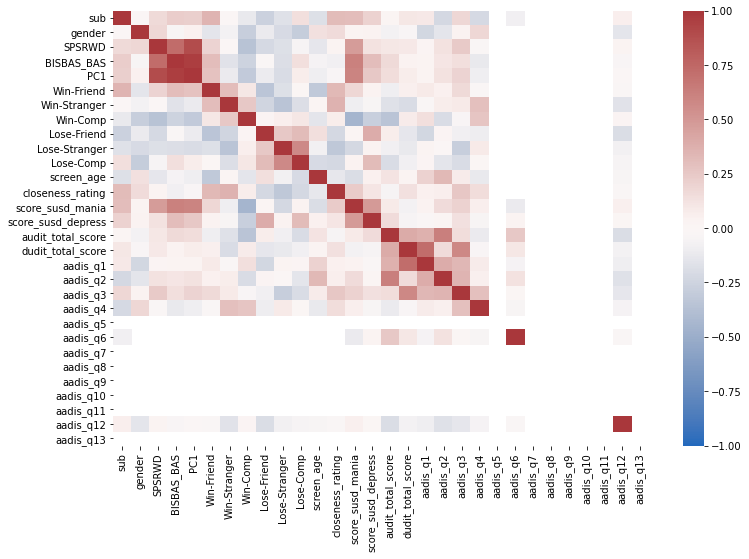

In [60]:
cormat=ASRD.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sms.heatmap(cormat,cmap='vlag',vmin=-1)